In [16]:
import numpy        as np
import os
from os             import listdir
from datetime       import datetime
import matplotlib.pyplot as plt
import matplotlib        as mpl
from natsort import natsorted

import sys
sys.path.append('/STER/silkem/ChemTorch/')
import modclass

In [25]:
## 1D model

outloc = '/STER/silkem/CSEchem/'
outdir = '20210521_gridC_Mdot1e-6_v15_T_eps-'
mod = 'model_2022-12-26h13-01-25'


abs_CSEmodel = modclass.read_data_1Dmodel(outloc+outdir+mod+'/csfrac_smooth.out')

In [19]:
outpath = '/STER/silkem/ChemTorch/out/'
dirname = 'bm_2'
dirs = listdir(outpath+dirname+'/')
dirs.remove('meta.json')
dirs = natsorted(dirs)

In [45]:
abs = []
p = []
dt = []
solver_time = []
overhead = []

for i in range(len(dirs)):
    chem = modclass.ChemTorchMod(dirname, dirs[i])
    abs.append(chem.n.T[-1])
    dt.append(chem.tstep[-1])
    p.append(chem.p)
    solver_time.append(chem.tictoc[0])
    overhead.append(chem.tictoc[1])

abs = np.array(abs)
p = np.array(p)
st = np.array(dt)
solver_time = np.array(solver_time)
overhead = np.array(overhead)

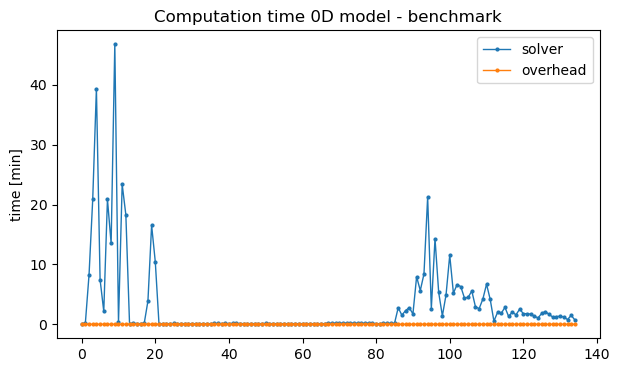

In [49]:
fig, ax1 = plt.subplots(figsize = (7,4)) 
ax1.set_title('Computation time 0D model (with scipy solver) - benchmark')

ax1.plot(solver_time * 1./60., '-o',ms = 2,lw = 1, label = 'solver')
ax1.plot(overhead * 1./60.  , '-o',ms = 2,lw = 1, label = 'overhead')

ax1.set_ylabel('time [min]')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

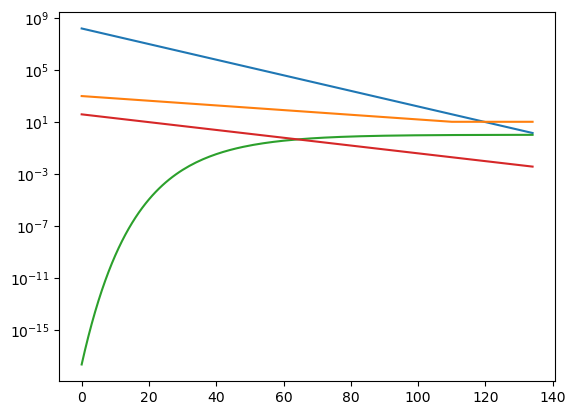

In [50]:
p = np.array(p)

plt.plot(p)

plt.yscale('log')

plt.show

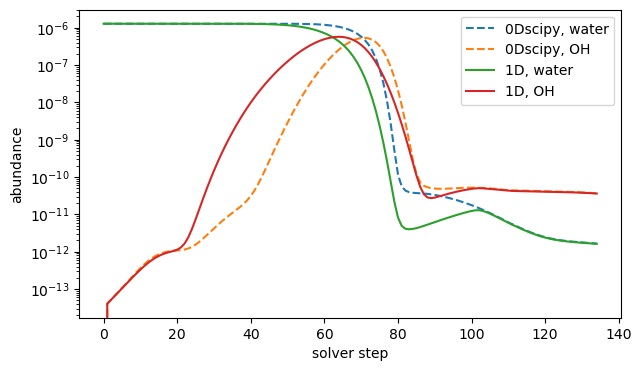

In [51]:
fig, ax1 = plt.subplots(figsize = (7,4)) 


i = 36
j = 30

ax1.plot(abs.T[i], '--', label = '0Dscipy, water')
ax1.plot(abs.T[j], '--', label = '0Dscipy, OH')

ax1.plot(abs_CSEmodel.T[i], '-', label = '1D, water')
ax1.plot(abs_CSEmodel.T[j], '-', label = '1D, OH')


ax1.set_yscale('log')
# ax1.set_ylim([1e-20,1e-2])

ax1.set_xlabel('solver step')
ax1.set_ylabel('abundance')

ax1.legend()

plt.show()

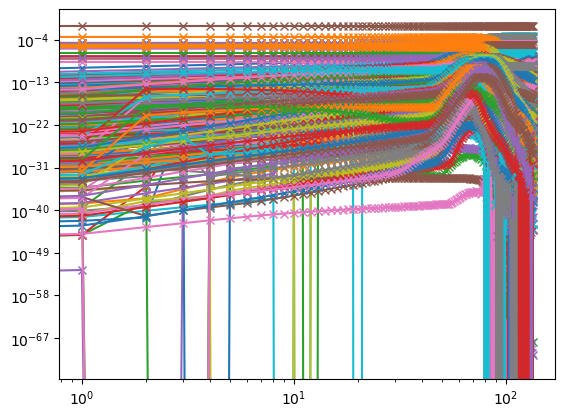

In [22]:
i = 0

# print((abs[i]))
plt.loglog(abs, '-x')
plt.show()